In [226]:
import pandas as pd
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [237]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["segmentations"],
    only_matching=True,
    classes=["cow"],
    max_samples=30,
    dataset_name='val_50_cat'
)
session = fo.launch_app(dataset)
# session.wait()

Found annotations at 'C:\Users\DannW\fiftyone\coco-2017\raw\instances_val2017.json'
 100% |████████████████████| 30/30 [2.7s elapsed, 0s remaining, 13.0 images/s]      
Writing annotations for 30 downloaded samples to 'C:\Users\DannW\fiftyone\coco-2017\validation\labels.json'
Dataset info written to 'C:\Users\DannW\fiftyone\coco-2017\info.json'
Loading existing dataset 'val_50_cat'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [31]:
img = Image.open('99606.jpg')
img_t = T.ToTensor()(img)
img_t.shape

torch.Size([3, 800, 800])

In [51]:
img_t

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [50]:
# aumentamos la resolucion x2
conv_trans = torch.nn.ConvTranspose1d(
    in_channels=800, 
    out_channels=1600, 
    kernel_size=2, 
    stride=2)
output = conv_trans(img_t)
output.shape

torch.Size([3, 1600, 1600])

In [15]:
import json
labels = json.load(open('validation/labels.json'))

In [19]:
labels.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [232]:
labels['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [75]:
label_img = labels['images'][0]
img = Image.open('validation/data/'+label_img['file_name'])
img_arr = np.array(img)
img_t = T.ToTensor()(img)
img_t.shape

torch.Size([3, 427, 640])

In [52]:
label_img

{'license': 1,
 'file_name': '000000219578.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000219578.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-17 16:03:13',
 'flickr_url': 'http://farm5.staticflickr.com/4094/4917146875_e48e614ff2_z.jpg',
 'id': 219578}

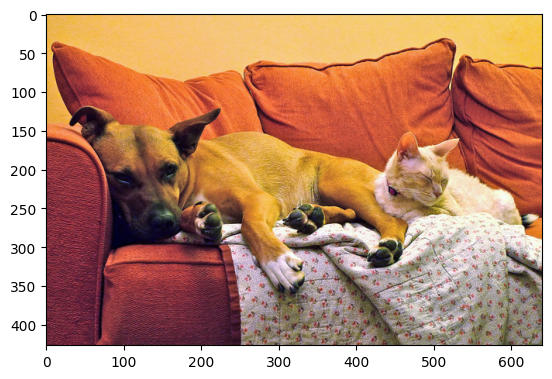

In [79]:
plt.imshow(img_arr)

In [66]:
labels_annotations_df = pd.DataFrame(labels['annotations'])
labels_categories_df = pd.DataFrame(labels['categories'])

In [67]:
labels_categories_df

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane
...,...,...,...
75,indoor,86,vase
76,indoor,87,scissors
77,indoor,88,teddy bear
78,indoor,89,hair drier


In [93]:
labels_annotations_df[labels_annotations_df['image_id']==label_img['id']]

,segmentation,area,iscrowd,image_id,bbox,category_id,id
29,"[[468.14, 274.62, 456.11, 314.14, 424.32, 328....",50242.48290,0,219578,"[29.11, 115.68, 439.03, 247.43]",18,6910
38,"[[420.56, 219.94, 432.52, 204.3, 440.8, 186.81...",13299.60840,0,219578,"[420.56, 148.16, 217.18, 128.84]",17,51543
40,"[[0.0, 313.35, 0.92, 422.86, 238.35, 422.86, 2...",40567.63785,0,219578,"[0.0, 140.34, 238.35, 282.52]",63,97882
49,"[[30.71, 131.46, 13.43, 86.36, 8.64, 42.22, 11...",68542.48065,0,219578,"[8.64, 28.79, 631.36, 258.12]",63,1604105


In [71]:
labels_categories_df[labels_categories_df['id']==18]

,supercategory,id,name
16,animal,18,dog


In [210]:
coco = COCO('datasets/raw/instances_val2017.json')
img_dir = 'datasets/validation/data'
image_id = 219578
# 
img = coco.imgs[image_id]

loading annotations into memory...
Done (t=0.81s)
creating index...
index created!


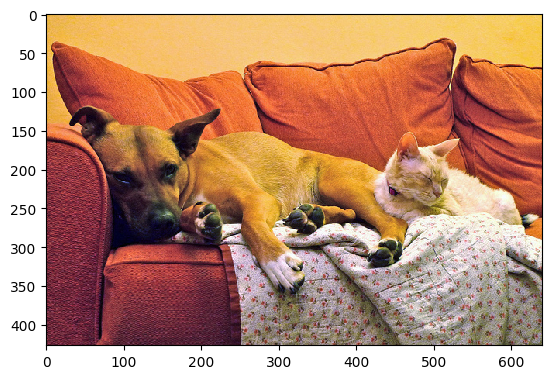

In [211]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

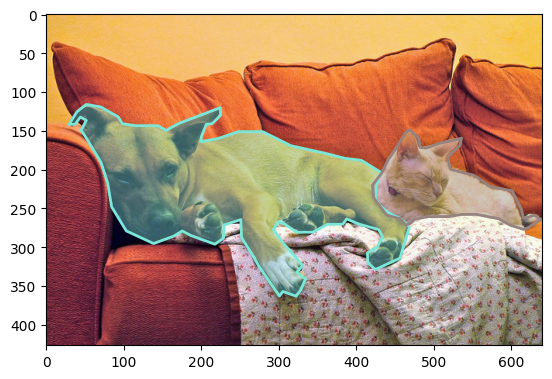

In [215]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=[17,18], iscrowd=None) #
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

In [213]:
len(anns)

4

In [194]:
empty_ann = anns[0]
empty_ann['segmentation'] = [[0.0, 0.0]]
empty_ann['area'] = 0.0

In [191]:
empty_ann

{'segmentation': [[0.0, 0.0]],
 'area': 50242.482900000025,
 'iscrowd': 0,
 'image_id': 219578,
 'bbox': [29.11, 115.68, 439.03, 247.43],
 'category_id': 18,
 'id': 6910}

In [205]:
mask = coco.annToMask(anns[0])
mask = mask * 0.0

In [207]:
np.max(mask)

0.0

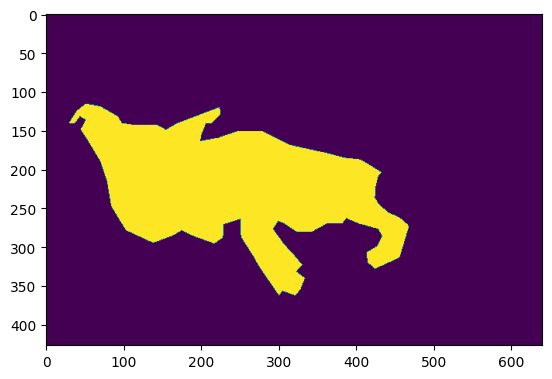

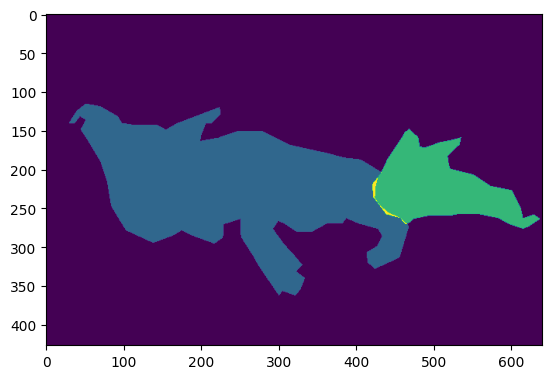

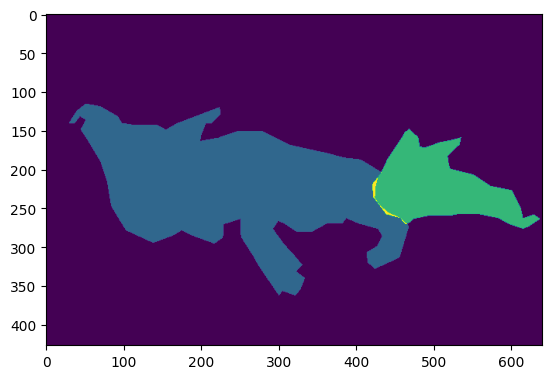

In [216]:
mask = coco.annToMask(anns[0]) * 0.0
# plt.imshow(mask)
# plt.show()
for i in range(len(anns)):
    mask += coco.annToMask(anns[i]) * (i+1)
    plt.imshow(mask)
    plt.show()

plt.imshow(mask)
plt.show()  



In [219]:
mask[mask>2.0] = 0

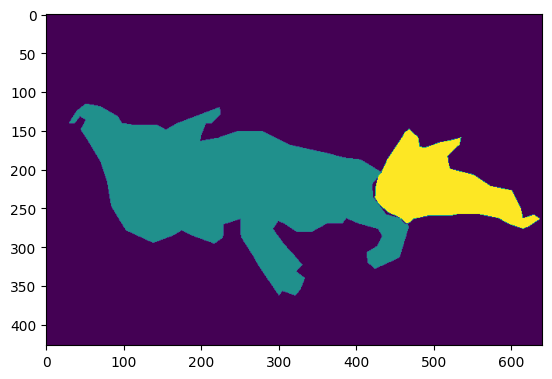

In [220]:
plt.imshow(mask)
plt.show()  